In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import requests
import time
import json
import os
from pprint import pprint

In [2]:
#loading the CSV file and reading 
clean_crime_data = pd.read_csv("data/clean_crimeData.csv")

In [5]:
clean_crime_data.set_index('CCN',inplace=True)

In [6]:
clean_crime_data.head()

,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,START_DATE,END_DATE,Lat,Log,year,month,day,hour,minute,second,quad,crimetype
CCN,,,,,,,,,,,,,,,,,,,,
8123749,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,8/30/2008 21:30,8/31/2008 18:40,-77.070209,38.913633,2008,8,31,20,47,0,Northwest,Non-Violent
8123824,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,8/31/2008 19:30,8/31/2008 23:30,-77.045323,38.908564,2008,9,1,0,45,0,Northwest,Non-Violent
8123835,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,8/31/2008 23:00,9/1/2008 2:00,-77.027045,38.899057,2008,9,1,3,0,0,Northeast,Non-Violent
8127848,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,9/9/2008 7:10,9/9/2008 0:00,-77.040089,38.909638,2008,9,9,7,46,0,Northwest,Non-Violent
8120153,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,8/5/2008 12:00,8/5/2008 13:00,-77.019377,38.894573,2008,8,24,20,0,0,Northeast,Non-Violent


## 	Assess Crime across years in DC area

In [9]:
bins = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
group_names = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

In [54]:
clean_crime_bin = clean_crime_data[0:len(clean_crime_data)].copy()
clean_crime_bin['year']=clean_crime_bin.year.astype('int64')
clean_crime_bin["Year"] = pd.cut(clean_crime_bin["year"], bins, labels=group_names)
CrimeMethod_Cnt = pd.DataFrame(clean_crime_bin.groupby(["Year","METHOD"])["METHOD"].count())
CrimeMethod_Cnt

METHOD
Year METHOD        
2008 GUN       2345
     KNIFE     1036
     OTHERS   27780
2009 GUN       2010
     KNIFE     1170
     OTHERS   28400
2010 GUN       1875
     KNIFE     1183
     OTHERS   30493
2011 GUN       2210
     KNIFE     1321
     OTHERS   31837
2012 GUN       2204
     KNIFE     1263
     OTHERS   32429
2013 GUN       1961
     KNIFE     1282
     OTHERS   35181
2014 GUN       2193
     KNIFE     1171
     OTHERS   33897
2015 GUN       2125
     KNIFE     1013
     OTHERS   34030
2016 GUN       1283
     KNIFE      707
     OTHERS   26034

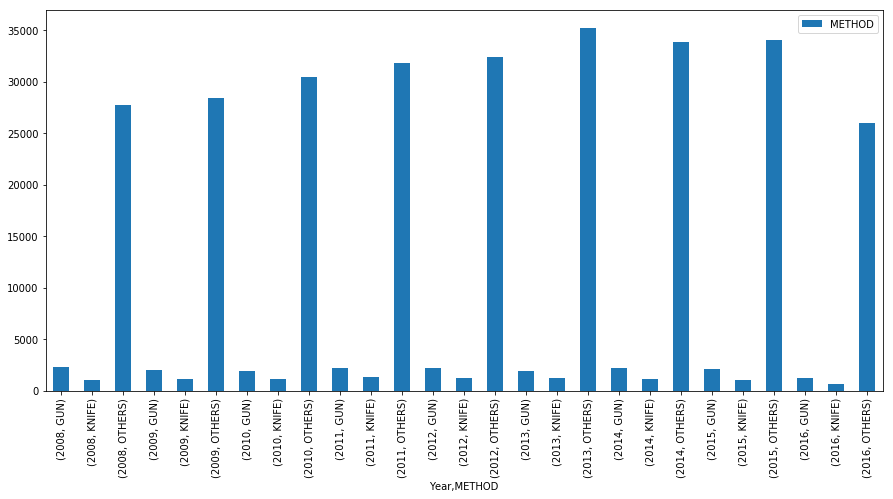

In [46]:
fig, ax = plt.subplots(figsize=(15,7))
pd.DataFrame(clean_crime_bin["METHOD"].count()).plot.bar(ax=ax)

In [ ]:
sns.factorplot(x=CrimeMethod_Cnt['Year'], y=CrimeMethod_Cnt['METHOD'], hue='col', kind='bar', data=CrimeMethod_Cnt)
plt.xlabel('Month_Year')
plt.ylabel('Mean value')